<h1> Notebook 1: </h1> <h2> Exploratory Analysis as classification problem</h2>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('stocknews/Combined_News_DJIA.csv')

In [4]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# split data into train and test, will go by date using approx 80-20 split
# train will be prior to 2015, and test will be everything after
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

<h3> Text preprocessing: </h3>Must preprocess the text fields and use count vectorizer to prepare for analysis

In [34]:
train.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",0
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,1
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal

In [35]:

text_example = train.iloc[0,2]
print text_example

b'BREAKING: Musharraf to be impeached.'


In [36]:
text_example = text_example.lower()
print text_example

b'breaking: musharraf to be impeached.'


In [37]:
text_example = CountVectorizer().build_tokenizer()(text_example)
print text_example

['breaking', 'musharraf', 'to', 'be', 'impeached']


In [9]:
pd.DataFrame([[x, text_example.count(x)] for x in set(text_example)], columns=['word','count']).head()

,word,count
0,georgia,1
1,countries,1
2,of,1
3,downs,1
4,move,1


In [10]:
# This is the right idea, but now must do this for every row of the dataset
# will combine all the 25 headlines into one long string first
train_news = []
rows = range(0,len(train.index))
for row in rows:
    train_news.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [11]:
# now we have our train news headlines for each row concatenated in the train_news array
print train_news[0]

b"Georgia 'downs two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green 

<h3> Now get into count vectorizer and basic logistic classification </h3>

In [12]:
# Apply a count vectorizer
count_vectorizer = CountVectorizer()
counts_train = count_vectorizer.fit_transform(train_news)
counts_train.shape

(1611, 31675)

In [13]:
# note that we are trying to predict 'Label' (+/- change in dow over a single day)
y_train = train.Label
y_test = test.Label

# fit a simple logisitc regression on the train data
logreg = LogisticRegression()
logreg = logreg.fit(counts_train, train.Label)

In [14]:
# apply same pre-process steps to test data in order to check regression accuracy
# gather test news headlines
test_news = []
rows = range(0,len(test.index))
for row in rows:
    test_news.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
# apply count vectorizer
counts_test = count_vectorizer.transform(test_news)
y_pred = logreg.predict(counts_test)

In [15]:
# check result with a crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,61,125
1,92,100


In [16]:
# :(  ... only 42% accuracy but lets check coefficients of important words
words = count_vectorizer.get_feature_names()
coeffs = logreg.coef_.tolist()[0]
coeff_df = pd.DataFrame({'word':words,'coefficient':coeffs}).sort_values(['coefficient', 'word'],
                                                                        ascending=[0,1])
print coeff_df.head(12)
print '---------------------------------'
print coeff_df.tail(12)


       coefficient       word
19419     0.497924    nigeria
25261     0.452526       self
29286     0.428011         tv
15998     0.425863      korea
20135     0.425716   olympics
15843     0.411636      kills
26323     0.411267         so
29256     0.394855       turn
10874     0.388555      fears
28274     0.384031  territory
25051     0.378578   scotland
28468     0.375247      three
---------------------------------
       coefficient       word
7754     -0.414480         de
26630    -0.414973     speech
27299    -0.424441   students
8478     -0.427079        did
6683     -0.431925      congo
12818    -0.444069    hacking
7139     -0.448570    country
16949    -0.463116        low
3651     -0.470454      begin
25433    -0.494555        sex
24754    -0.549725  sanctions
24542    -0.587794        run


<h3> Will use a more complex count vectorizer with some hyperparameters </h3>
First with ngram range (2,3)

In [17]:
hyper_vect = CountVectorizer(ngram_range=(2,3))
hyper_train = hyper_vect.fit_transform(train_news)
print hyper_train.shape

(1611, 977861)


In [18]:
# fit a logistic regression model
hyper_logreg = LogisticRegression()
hyper_logreg = hyper_logreg.fit(hyper_train, y_train)

In [19]:
hyper_test = hyper_vect.transform(test_news)
hyper_y_pred = hyper_logreg.predict(hyper_test)


In [20]:
# cross tab to check accuracy
pd.crosstab(test.Label, hyper_y_pred,rownames=['Actual'], colnames=['Pred'])

Pred,0,1
Actual,,
0,50,136
1,24,168


In [21]:
# 57.7 % accuracy is definitely improved, but still not a good model
# lets check coefficients for most important phrases again

In [22]:
hyper_words = hyper_vect.get_feature_names()
hyper_coeffs = hyper_logreg.coef_.tolist()[0]
hyper_coeffs_df = pd.DataFrame({'word':hyper_words,
                               'coeff':hyper_coeffs}).sort_values('coeff')
print hyper_coeffs_df.head(10)
print'----------------------------'
print hyper_coeffs_df.tail(10)

           coeff         word
822358 -0.224925  the country
906529 -0.133291        up in
956046 -0.132422    with iran
867485 -0.131644      to kill
407925 -0.131637      in gaza
128175 -0.128667    bin laden
845916 -0.123590     there is
865863 -0.122024      to help
638452 -0.119953   people are
1750   -0.118220       10 000
----------------------------
           coeff         word
317372  0.137376    forced to
849935  0.137777      this is
558014  0.146443  new zealand
875074  0.146739       to the
950581  0.153660      will be
405320  0.161629     in china
745001  0.166911       set to
825374  0.176790    the first
64200   0.179835    and other
711158  0.185773     right to


<h1> This was all done based on 'Label' (Increase/Decrease in today's dow price) </h1>
<h1> Now will do the same but for Incease/Decrease from one day's close to the next day's close </h1>

In [23]:
binary_change = pd.read_csv('change_in_close')
binary_change.tail()


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Adj Close,sentiment_all,sentiment1_10,ME_count,DJ_count,binary_change
1984,1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-0.030183,-0.070513,3,1,1
1985,1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.047618,0.029630,0,2,1
1986,1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.046901,0.070476,2,0,1
1987,1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-0.005811,-0.132653,4,1,1
1988,1988,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-0.036532,0.133333,1,0,0


In [24]:
tomorrow_change = binary_change.binary_change
tomorrow_change = pd.DataFrame(tomorrow_change)
tomorrow_change.head()

,binary_change
0,1
1,0
2,0
3,1
4,1


In [25]:
data = data.join(tomorrow_change)

In [26]:
data = data.rename(columns={'binary_change':'nextday_change'})
data.drop('Label',axis=1,inplace=True)
data.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0


In [27]:
# we now have the column 'nextday_change' as the outcome variable
# must reset train and test
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
# now repeat previous procedure

In [28]:
# Apply a count vectorizer
count_vectorizer = CountVectorizer()
counts_train = count_vectorizer.fit_transform(train_news)
print counts_train.shape

# note that we are trying to predict 'Label'
y_train = train.nextday_change
y_test = test.nextday_change

# fit a simple logisitc regression on the train data
logreg = LogisticRegression()
logreg = logreg.fit(counts_train, y_train)

#apply count vectorizer to test news headlines
counts_test = count_vectorizer.transform(test_news)
y_pred = logreg.predict(counts_test)

# check the crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames = ['Predicted'])

(1611, 31675)


Predicted,0,1
Actual,,
0,82,105
1,84,107


In [29]:
#exactly 50% accuracy....not great and similar to predcitions for same day dow change

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

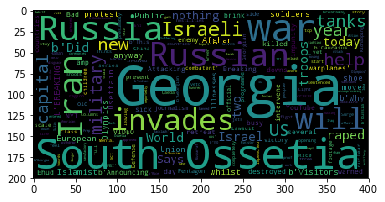

In [31]:
# create a wordcloud for train news headlines
wordcloud_train = WordCloud(background_color='black').generate(train_news[0])
plt.imshow(wordcloud_train)

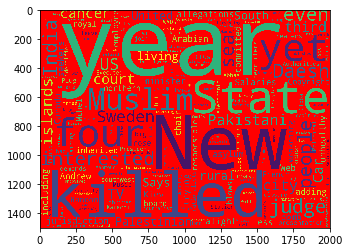

In [32]:
# wordcloud for train data
wordcloud_test = WordCloud(background_color='red', width=2000, height=1500).generate(test_news[0])
plt.imshow(wordcloud_test)

In [33]:
# so seems like predictions will be tough since popular news headlines (and the words in them) 
# change significantly over time
# not sure how I will control for this.....